<a href="https://colab.research.google.com/github/AgomferAustral/DMA-Caras/blob/main/EigenfacesMZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# conexion al Google Drive
from google.colab import drive
drive.mount('/content/.drive')

Drive already mounted at /content/.drive; to attempt to forcibly remount, call drive.mount("/content/.drive", force_remount=True).


In [2]:
# Importacion de librerias
import mediapipe as mp

In [3]:
import os
import cv2
import sys
import numpy as np

In [2]:
!pip install --upgrade numpy
!pip install --upgrade scipy

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


In [4]:
!pip install --upgrade mediapipe

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4


In [4]:
# Definicion de ruta de conexion
ruta_imagenes = '/content/.drive/My Drive/DMA/imagenes'

In [5]:
# Carga de imagenes
imagenes = []
for nombre_archivo in os.listdir(ruta_imagenes):
       ruta_imagen = os.path.join(ruta_imagenes, nombre_archivo)
       imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)  # Carga en escala de grises
       imagenes.append(imagen)

In [6]:
print(f"Se cargaron {len(imagenes)} imágenes.")

Se cargaron 293 imágenes.


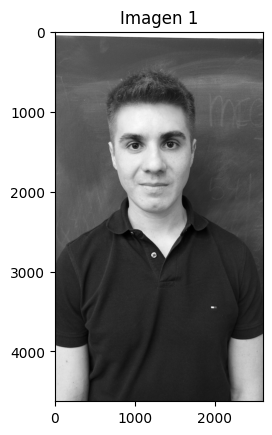

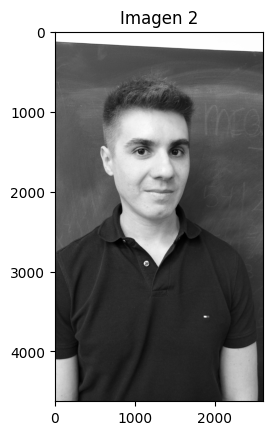

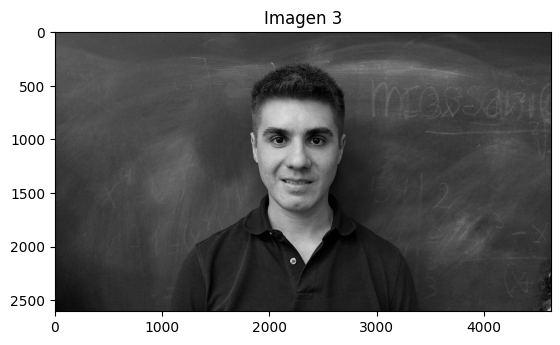

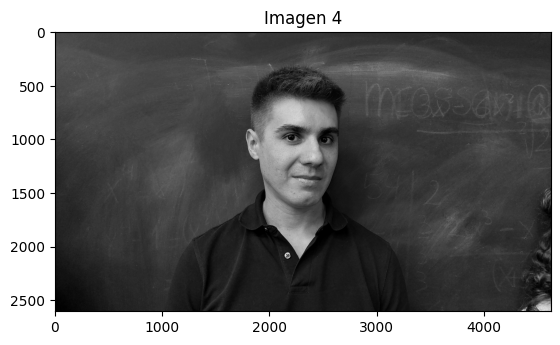

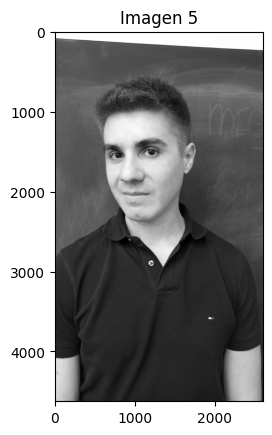

In [7]:
# Mostrar imagenes importadas
import matplotlib.pyplot as plt

# Mostrar las primeras 5 imágenes
for i in range(min(5, len(imagenes))):
    plt.imshow(imagenes[i], cmap='gray')
    plt.title(f"Imagen {i + 1}")
    plt.show()

In [8]:
# Deteccion de rostro
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5)

In [9]:
# Recortar imagenes
imagenes_recortadas = []
for imagen in imagenes:
  # Convertir la imagen de escala de grises a RGB
  imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_GRAY2RGB)

  # Detectar rostros en la imagen
  results = face_detection.process(imagen_rgb)

  # Si se encuentra al menos un rostro
  if results.detections:
    for detection in results.detections:
      # Obtener la bounding box del rostro
      bbox = detection.location_data.relative_bounding_box

      # Calcular las coordenadas de la bounding box en píxeles
      h, w = imagen.shape
      x = int(bbox.xmin * w)
      y = int(bbox.ymin * h)
      width = int(bbox.width * w)
      height = int(bbox.height * h)

      # Recortar la imagen usando la bounding box
      rostro_recortado = imagen[y:y+height, x:x+width]

      # Añadir la imagen recortada a la lista
      imagenes_recortadas.append(rostro_recortado)

face_detection.close()

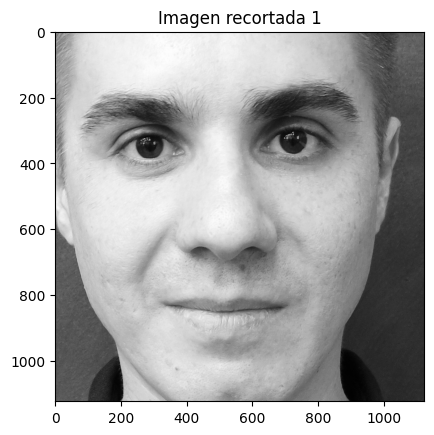

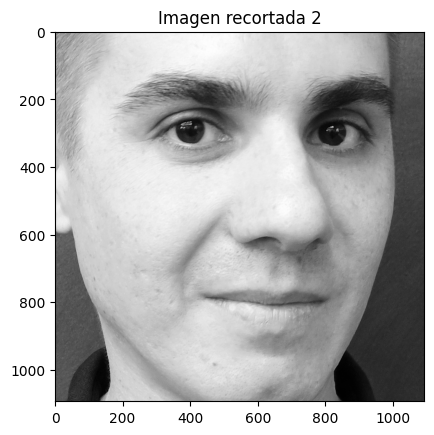

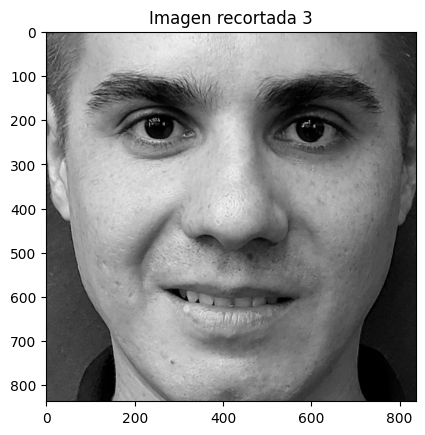

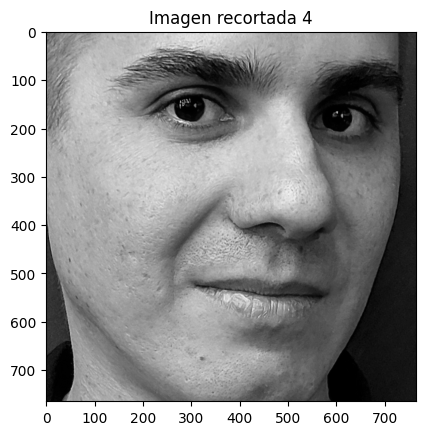

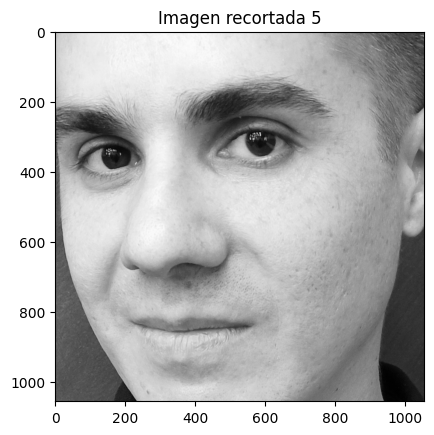

In [10]:
import matplotlib.pyplot as plt

# Mostrar las primeras 5 imágenes recortadas
for i in range(min(5, len(imagenes_recortadas))):
    plt.imshow(imagenes_recortadas[i], cmap='gray')
    plt.title(f"Imagen recortada {i + 1}")
    plt.show()

In [11]:
# Escarlar imagenes
tamaños_comunes = [(70, 70)]

# Escalar las imágenes a cada tamaño común
imagenes_escaladas = [cv2.resize(image, tamaños_comunes[0]) for image in imagenes_recortadas]


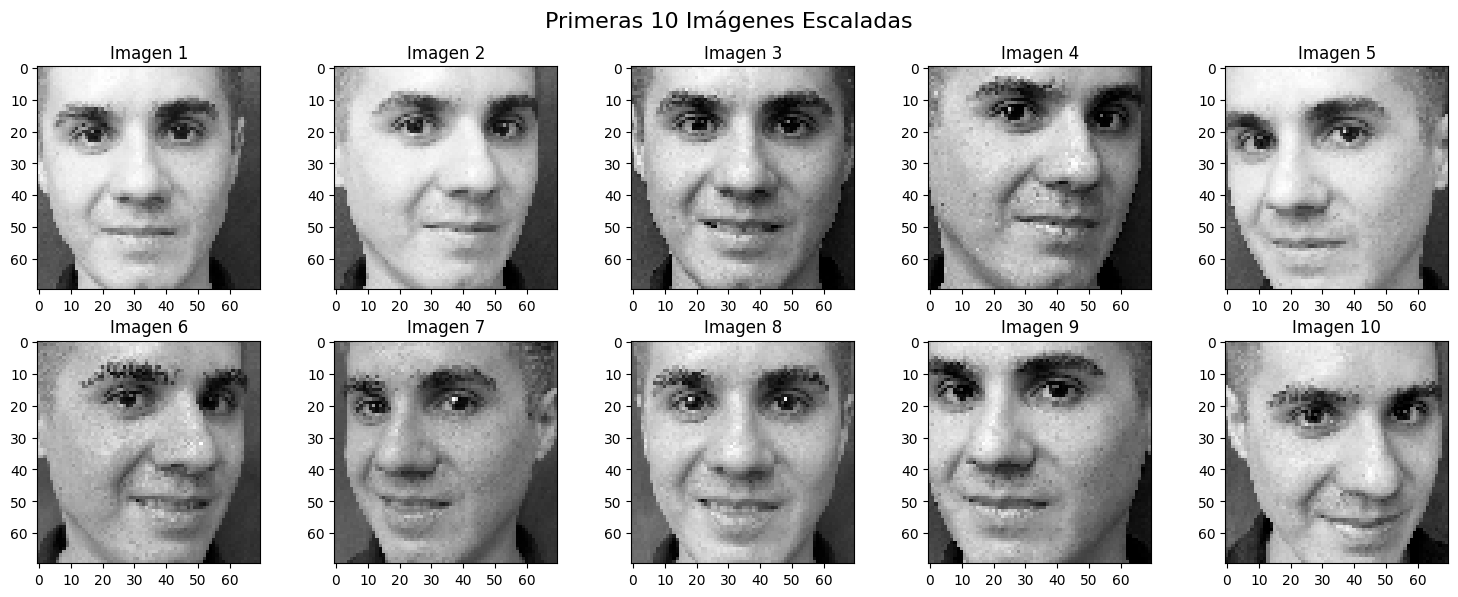

In [14]:
# Visualizar las primeras 10 imágenes escaladas
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 filas, 5 columnas
fig.suptitle("Primeras 10 Imágenes Escaladas", fontsize=16)

for i, imagen in enumerate(imagenes_escaladas[:10]):
    ax = axes[i // 5, i % 5]  # Calcula la posición en la cuadrícula
    ax.imshow(imagen, cmap='gray')  # Muestra la imagen en escala de grises
    ax.set_title(f"Imagen {i + 1}")

    # Agregar valores en los ejes
    ax.set_xticks(np.arange(0, imagen.shape[1], 10))  # Marcas cada 10 píxeles en el eje x
    ax.set_yticks(np.arange(0, imagen.shape[0], 10))  # Marcas cada 10 píxeles en el eje y
    ax.set_xticklabels(np.arange(0, imagen.shape[1], 10))  # Etiquetas cada 10 píxeles en el eje x
    ax.set_yticklabels(np.arange(0, imagen.shape[0], 10))  # Etiquetas cada 10 píxeles en el eje y

plt.tight_layout()
plt.show()

In [15]:
# Crecion de matris 2D


# Crear la matriz de datos
m = len(imagenes_escaladas)
d = tamaños_comunes[0][0] * tamaños_comunes[0][1]
X = np.reshape(imagenes_escaladas, (m, d))


In [16]:
# Obtencion de componentes principales

from sklearn.decomposition import PCA

# Aplicar SVD
U, Sigma, VT = np.linalg.svd(X, full_matrices=False)

# Aplicar PCA usando SVD
pca = PCA(n_components=50)  # Reducir a x componentes principales
pca.fit(X)  # Ajustar PCA a la matriz de datos
componentes_principales = pca.transform(X) # Transformar los datos
